<a href="https://colab.research.google.com/github/juliocesarortiz/DataScience/blob/main/DSA06_PCA_FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [136]:

# Open file
file_path = '/content/sample_data/Employees_DSA06.csv'
datos = pd.read_csv(file_path)

datos.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [137]:
# Familiarizacion con los datos determinando el tamano de la matriz
datos.shape

(7000, 17)

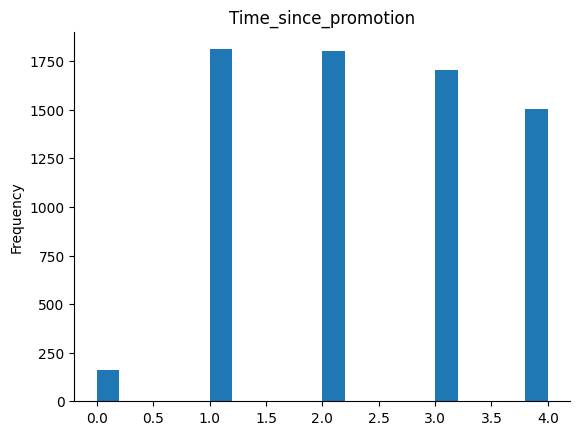

In [35]:
# @title Time_since_promotion

from matplotlib import pyplot as plt
datos['Time_since_promotion'].plot(kind='hist', bins=20, title='Time_since_promotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

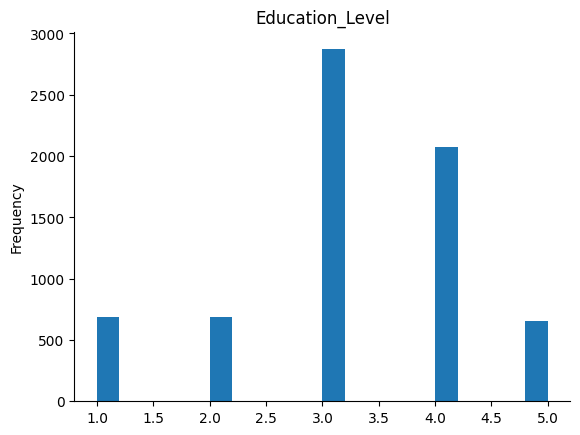

In [34]:
# @title Education_Level

from matplotlib import pyplot as plt
datos['Education_Level'].plot(kind='hist', bins=20, title='Education_Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

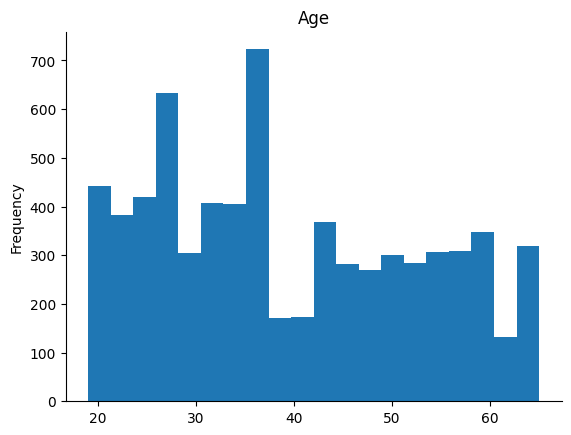

In [36]:
# @title Age

from matplotlib import pyplot as plt
datos['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Tema 1: Familiarizacion y limpieza de datos

In [138]:
pd.isna(datos).sum()

#Age , Time of service son las variables con mas datos perdidos

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [139]:
#  Drop Employee_ID no es relevante.

datos = datos.drop('Employee_ID', axis=1)
datos.head()


,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [140]:
# Detectar valores perdidos, decidir y aplicar la técnica apropiada para
# imputar valores.

# Imputación de valores perdidos en 'Age' con la mediana
datos['Age'].fillna(datos['Age'].median(), inplace=True)

# Imputación de valores perdidos en 'Time of Service' con la mediana
datos['Time_of_service'].fillna(datos['Time_of_service'].median(), inplace=True)

# Eliminar registros con valores faltantes en 'Work_Life_balance' y 'Pay_Scale'
datos.dropna(subset=['Work_Life_balance', 'Pay_Scale'], inplace=True)

# Verificar si quedan valores perdidos
pd.isna(datos).sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

In [141]:
# Divide Compensation_and_Benefits dejando solo el ultimo caracter numerico
datos['Compensation_and_Benefits'] = datos['Compensation_and_Benefits'].str[-1].astype(int)
#print(datos['Compensation_and_Benefits'])

In [142]:
# Separa en dataframe los datos catergoricos

# Separa en dataframe los datos catergoricos
categorical_cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess']
datos_categoricos = datos[categorical_cols]
datos_categoricos.head()


,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess
0,F,Married,Franklin,IT,Conceptual
1,M,Single,Springfield,Logistics,Analytical
2,F,Married,Clinton,Quality,Conceptual
3,F,Single,Lebanon,Human Resource Management,Behavioral
4,F,Married,Springfield,Logistics,Conceptual


In [143]:
datos_categoricos.shape

(6981, 5)

In [144]:
# describe las variables numericas

# Seleccionar solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=['float', 'int'])

# Obtener estadísticas descriptivas
descripcion = datos_numericos.describe()

print(descripcion)
#No se detectan valores atípicos en las variables numéricas.



               Age  Education_Level  Time_of_service  Time_since_promotion  \
count  6981.000000      6981.000000      6981.000000           6981.000000   
mean     39.469274         3.188368        13.315714              2.368285   
std      13.220462         1.064489        10.271223              1.149445   
min      19.000000         1.000000         0.000000              0.000000   
25%      28.000000         3.000000         5.000000              1.000000   
50%      37.000000         3.000000        10.000000              2.000000   
75%      51.000000         4.000000        20.000000              3.000000   
max      65.000000         5.000000        43.000000              4.000000   

       growth_rate  Travel_Rate   Post_Level    Pay_Scale  \
count  6981.000000  6981.000000  6981.000000  6981.000000   
mean     47.081650     0.818651     2.796734     6.005443   
std      15.759208     0.648164     1.163716     2.057407   
min      20.000000     0.000000     1.000000     1.00

In [145]:
# drop de los encabezados de datos_numericos,
# despues hace escalamiento y  agrega de nuevo los encabezados

# Eliminar encabezados
datos_sin_encabezados = datos_numericos.values

# Escalar los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_sin_encabezados)

# Convertir los datos escalados de nuevo a un DataFrame de Pandas y restaurar los encabezados
datos_escalados_df = pd.DataFrame(datos_escalados, columns=datos_numericos.columns)

# Mostrar los primeros registros del DataFrame escalado con encabezados
datos_escalados_df.head()
datos_escalados_df.describe()
#media 0 y desv estandar 1

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
count,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03,6.981000e+03
mean,2.343539e-16,-1.221388e-17,5.292683e-17,3.765948e-17,-1.312993e-16,-9.872890e-17,-1.145052e-17,-7.328331e-17,-2.623441e-16,-2.279925e-16,-1.669231e-16
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.548413e+00,-2.055940e+00,-1.296503e+00,-2.060521e+00,-1.718588e+00,-1.263121e+00,-1.544073e+00,-2.433064e+00,-3.251017e+00,-1.235952e+00,-1.019534e+00
25%,-8.676017e-01,-1.769693e-01,-8.096709e-01,-1.190473e+00,-8.936146e-01,-1.263121e+00,-6.846953e-01,-4.887295e-01,-5.068843e-01,-1.235952e+00,-6.410412e-01
50%,-1.867900e-01,-1.769693e-01,-3.228390e-01,-3.204258e-01,-5.181481e-03,2.798095e-01,1.746822e-01,-2.645921e-03,-5.068843e-01,-3.453470e-01,-2.517808e-01
75%,8.722503e-01,7.625158e-01,6.508246e-01,5.496218e-01,8.832517e-01,2.798095e-01,1.746822e-01,9.695213e-01,8.651820e-01,5.452578e-01,2.456972e-01
max,1.931291e+00,1.702001e+00,2.890251e+00,1.419669e+00,1.708225e+00,1.822740e+00,1.893437e+00,1.941689e+00,2.237248e+00,2.326467e+00,4.342353e+00


In [146]:
#Redondea a dos digitos
datos_escalados_df = datos_escalados_df.round(2)
datos_escalados_df.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,0.19,0.76,-0.91,1.42,-0.89,0.28,-1.54,0.48,-0.51,0.55,-0.03
1,-1.17,-0.18,-0.81,1.42,-0.70,-1.26,0.17,-0.00,-0.51,1.44,-0.66
2,1.40,-0.18,1.33,0.55,0.25,-1.26,-0.68,0.97,-0.51,-1.24,-0.56
3,-1.02,-0.18,-0.91,0.55,0.57,0.28,0.17,0.97,-0.51,-1.24,-0.66
4,-0.64,-2.06,-0.81,1.42,0.95,0.28,0.17,-1.95,0.87,0.55,-0.04


PCA

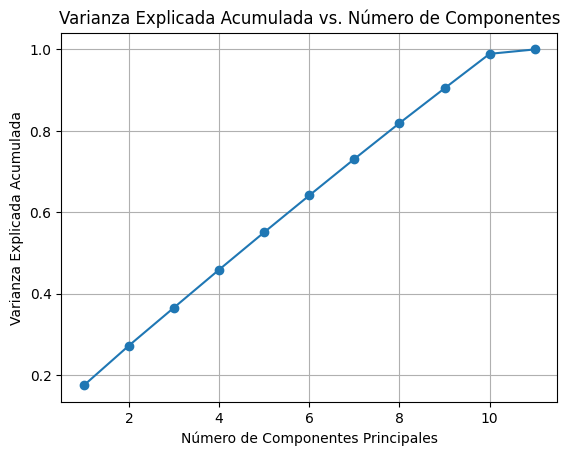

Número de componentes principales a utilizar: 10
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.190537  0.452527  0.528855 -1.070244  0.023463 -0.627014 -0.095288   
1 -1.067776  0.617709  0.534833 -1.291994  0.809398  0.194936 -0.049546   
2  2.034952 -0.980410  0.897623 -0.307810 -0.428516 -0.315800 -1.541019   
3 -1.173217 -0.996049  0.008310  0.866136 -0.774535 -0.078798 -0.852121   
4 -0.735159  1.404889  0.470836  0.119416 -1.470088  2.343312  1.175813   

        PC8       PC9      PC10  
0 -0.025203 -2.188538  0.195564  
1 -0.227054 -0.913671 -1.955816  
2  0.667687  0.021673 -0.337426  
3  0.413419 -0.860306 -0.662656  
4 -0.074158  0.081273 -1.175267  


In [147]:

# Crear una instancia de PCA
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(datos_escalados_df)

# Obtener la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Graficar la varianza explicada acumulada
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes')
plt.grid(True)
plt.show()

# Elegir el número de componentes principales que explican una cantidad suficiente de varianza (por ejemplo, 95%)
num_componentes = np.argmax(varianza_acumulada >= 0.95) + 1
print("Número de componentes principales a utilizar:", num_componentes)

# Crear una nueva instancia de PCA con el número de componentes elegido
pca_final = PCA(n_components=num_componentes)

# Transformar los datos escalados utilizando PCA
datos_pca = pca_final.fit_transform(datos_escalados_df)

# Crear un DataFrame con los datos transformados
datos_pca_df = pd.DataFrame(datos_pca, columns=[f'PC{i+1}' for i in range(num_componentes)])

# Mostrar los primeros registros del DataFrame con los datos transformados
print(datos_pca_df.head())


In [148]:
datos_pca_df.shape

(6981, 10)

FACTOR ANALISIS

In [149]:
#De datos_categoricos transforma Gender y Relationship_Status a booleano entero

# Assuming 'Male' maps to 1 and 'Female' maps to 0
datos_categoricos['Gender'] = datos_categoricos['Gender'].map({'M': 1, 'F': 0})

# Assuming 'Married' maps to 1 and 'Single' maps to 0
datos_categoricos['Relationship_Status'] = datos_categoricos['Relationship_Status'].map({'Married': 1, 'Single': 0})
datos_categoricos.shape

(6981, 5)

In [151]:
# transforma usando  hot encoder para Hometown Unit and Decision_skill_possess

from sklearn.preprocessing import OneHotEncoder

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Ajustar el encoder a las columnas categóricas
encoder.fit(datos_categoricos[['Hometown', 'Unit', 'Decision_skill_possess']])

# Transformar las columnas categóricas utilizando one-hot encoding
encoded_data = encoder.transform(datos_categoricos[['Hometown', 'Unit', 'Decision_skill_possess']]).toarray()

# Crear un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Hometown', 'Unit', 'Decision_skill_possess']))


# Mostrar los primeros registros del DataFrame con las columnas categóricas codificad
encoded_df.head()



,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:


# Reiniciar los índices de encoded_df y datos_categoricos
encoded_df.reset_index(drop=True, inplace=True)
datos_categoricos.reset_index(drop=True, inplace=True)


In [154]:


# Concatenar encoded_df y datos_categoricos
datos_categoricos_encoded = pd.concat([datos_categoricos, encoded_df], axis=1)

# Eliminar las columnas originales 'Hometown', 'Unit' y 'Decision_skill_possess'
datos_categoricos_encoded = datos_categoricos_encoded.drop(['Hometown', 'Unit', 'Decision_skill_possess'], axis=1)

# Mostrar los primeros registros del DataFrame resultante
datos_categoricos_encoded.head()

,Gender,Relationship_Status,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:


# Concatenar datos_pca_df y datos_categoricos_encoded
datos_combinados = pd.concat([datos_pca_df, datos_categoricos_encoded], axis=1)

# Mostrar los primeros registros del DataFrame combinado
datos_combinados.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,-0.190537,0.452527,0.528855,-1.070244,0.023463,-0.627014,-0.095288,-0.025203,-2.188538,0.195564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.067776,0.617709,0.534833,-1.291994,0.809398,0.194936,-0.049546,-0.227054,-0.913671,-1.955816,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.034952,-0.980410,0.897623,-0.307810,-0.428516,-0.315800,-1.541019,0.667687,0.021673,-0.337426,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.173217,-0.996049,0.008310,0.866136,-0.774535,-0.078798,-0.852121,0.413419,-0.860306,-0.662656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.735159,1.404889,0.470836,0.119416,-1.470088,2.343312,1.175813,-0.074158,0.081273,-1.175267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
!pip install factor_analyzer # Install the missing module
import factor_analyzer as fa

# Crear un objeto FactorAnalyzer
fa_model = fa.FactorAnalyzer(rotation="varimax", n_factors=datos_combinados.shape[1])

# Ajustar el modelo a los datos combinados
fa_model.fit(datos_combinados)

# Obtener las cargas factoriales
cargas_factoriales = fa_model.loadings_

# Crear un DataFrame con las cargas factoriales
cargas_factoriales_df = pd.DataFrame(cargas_factoriales, index=datos_combinados.columns)

# Mostrar las cargas factoriales
print(cargas_factoriales_df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=d6d3c15ba0efd135ecd9bf30b727fa21c0f40ce14d3bc0ff5be748f0b4017596
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
                                         0         1         2         3   \
PC1                                0.011891  0.002569  0.010995 -0.009832   
PC2                                0.001393  0.006604  0.003621  0.012471   
PC3                                0.000234 -0.008681  0.010401  0.007885   
PC4                               -0.006403  0.007583 -0.000537  0.001965   
PC5                               -0.002030 -0.000127  0.001539 -0.000318   
PC6      